In [1]:
import librosa
import numpy as np




In [2]:
pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.5/390.5 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 15.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
file_path= "/Users/priyanshipal/Documents/Aalto/Acads/speech_recognition/project/CREMA-D/AudioWAV/"

In [3]:
import os

In [4]:
pip install tqdm


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tqdm import tqdm

def extract_mfcc(file_path, n_mfcc=13):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed

# Path to the directory containing audio files
directory_path = '/Users/priyanshipal/Documents/Aalto/Acads/speech_recognition/project/CREMA-D/AudioWAV/'

# List all .wav files in the directory
audio_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.wav')]

# Extract MFCC features for each audio file with a progress bar
mfcc_features = []
for file in tqdm(audio_files, desc="Extracting MFCC Features"):
    mfcc_features.append(extract_mfcc(file))


Extracting MFCC Features: 100%|████████████| 7442/7442 [00:29<00:00, 249.47it/s]


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming mfcc_features is a list of MFCCs for each audio file
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mfcc_features)

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_features)

# The cluster labels for each point
labels = kmeans.labels_


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


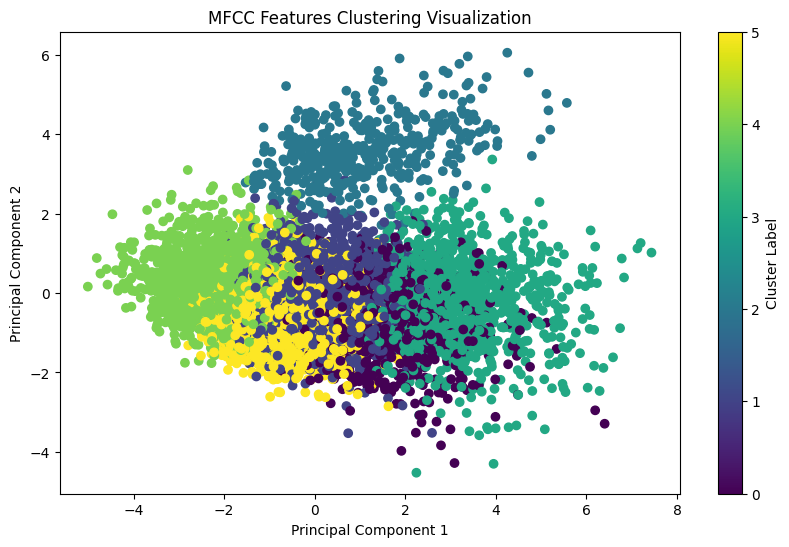

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o')

# Labeling the plot
plt.title('MFCC Features Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.show()


In [20]:
import re
import os
import numpy as np

# Function to extract emotion, sentence acronym, and emotion intensity from filename
def extract_attributes(filename):
    emotion = re.search(r'\d+_.*_(.*)_.*', filename)
    sentence = re.search(r'\d+_(.*)_.*_.*', filename)
    intensity = re.search(r'\d+_*_.*_(.*)', filename)
    return (
        emotion.group(1) if emotion else None,
        sentence.group(1) if sentence else None,
        intensity.group(1) if intensity else None
    )

# List all .wav files in the directory
directory_path = '/Users/priyanshipal/Documents/Aalto/Acads/speech_recognition/project/CREMA-D/AudioWAV/'
audio_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.wav')]

# Extract attributes for each file
attributes = [extract_attributes(filename) for filename in audio_files]


# Analyze the clustering based on sentence and emotion
cluster_analysis = {}
for label, (emotion, sentence, intensity) in zip(labels, attributes):
    if label not in cluster_analysis:
        cluster_analysis[label] = {}
    if sentence not in cluster_analysis[label]:
        cluster_analysis[label][sentence] = {}
    if emotion not in cluster_analysis[label][sentence]:
        cluster_analysis[label][sentence][emotion] = 0
    cluster_analysis[label][sentence][emotion] += 1

# Print the analysis
for cluster, sentence_data in cluster_analysis.items():
    print(f"Cluster {cluster}:")
    for sentence, emotion_data in sentence_data.items():
        print(f"  Sentence {sentence}:")
        for emotion, count in emotion_data.items():
            print(f"    Emotion {emotion}: {count}")


Cluster 3:
  Sentence ITS:
    Emotion ANG: 36
    Emotion DIS: 1
    Emotion FEA: 8
    Emotion HAP: 10
  Sentence IEO:
    Emotion ANG: 146
    Emotion DIS: 31
    Emotion HAP: 48
    Emotion FEA: 54
    Emotion SAD: 2
  Sentence IWW:
    Emotion ANG: 40
    Emotion HAP: 10
    Emotion SAD: 1
    Emotion DIS: 6
    Emotion FEA: 3
  Sentence ITH:
    Emotion ANG: 43
    Emotion FEA: 11
    Emotion HAP: 16
    Emotion DIS: 3
    Emotion NEU: 1
  Sentence TAI:
    Emotion NEU: 1
    Emotion FEA: 9
    Emotion ANG: 40
    Emotion HAP: 15
    Emotion DIS: 4
  Sentence IOM:
    Emotion ANG: 23
    Emotion HAP: 2
    Emotion DIS: 1
  Sentence TSI:
    Emotion FEA: 14
    Emotion ANG: 47
    Emotion HAP: 13
    Emotion DIS: 4
    Emotion SAD: 1
  Sentence MTI:
    Emotion HAP: 5
    Emotion ANG: 20
    Emotion DIS: 2
    Emotion FEA: 4
  Sentence WSI:
    Emotion HAP: 24
    Emotion ANG: 52
    Emotion FEA: 18
    Emotion DIS: 8
    Emotion SAD: 1
    Emotion NEU: 2
  Sentence TIE:
    Emoti

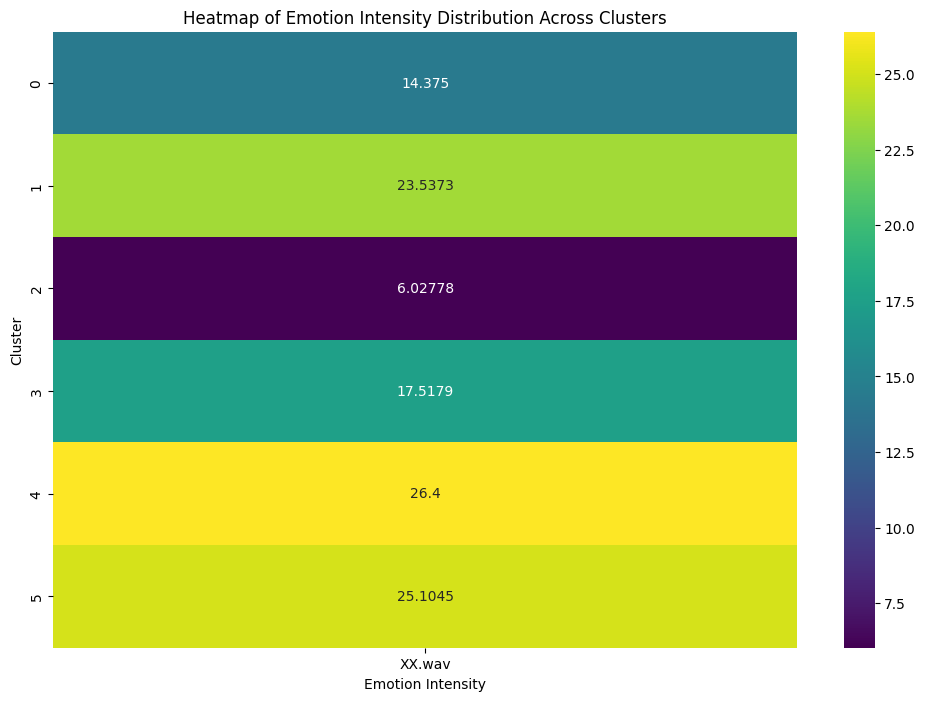

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the cluster analysis dictionary to a format suitable for a DataFrame
# Adjusting to focus on emotion intensity
data_for_df = []
for cluster, sentence_data in cluster_analysis.items():
    for sentence, emotion_data in sentence_data.items():
        for emotion, count in emotion_data.items():
            data_for_df.append({
                'Cluster': cluster,
                'Emotion': emotion,
                'Intensity': intensity,  # Using intensity instead of sentence
                'Count': count
            })

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(index='Cluster', columns='Intensity', values='Count', fill_value=0)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Emotion Intensity Distribution Across Clusters')
plt.ylabel('Cluster')
plt.xlabel('Emotion Intensity')
plt.show()


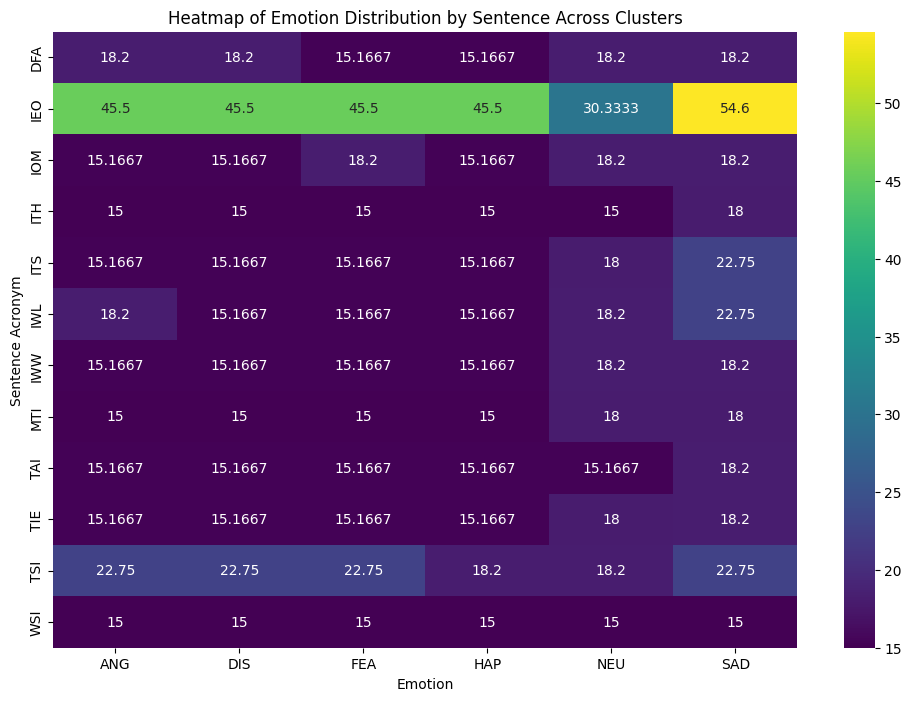

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the cluster analysis dictionary to a format suitable for a DataFrame
data_for_df = []
for cluster, sentence_data in cluster_analysis.items():
    for sentence, emotion_data in sentence_data.items():
        for emotion, count in emotion_data.items():
            data_for_df.append({
                'Cluster': cluster,
                'Sentence': sentence,
                'Emotion': emotion,
                'Count': count
            })

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(index='Sentence', columns='Emotion', values='Count', fill_value=0)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Emotion Distribution by Sentence Across Clusters')
plt.ylabel('Sentence Acronym')
plt.xlabel('Emotion')
plt.show()


In [10]:
directory_path = '/Users/priyanshipal/Documents/Aalto/Acads/speech_recognition/project/CREMA-D/AudioWAV/'

# List all .wav files in the directory
audio_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.wav')]
# Function to extract emotion from filename using regex
def extract_emotion(filename):
    match = re.search(r'\d+_.*_(.*)_.*', filename)
    return match.group(1) if match else None

# Assuming file_names is a list of filenames corresponding to each audio file in mfcc_features
emotion_labels = [extract_emotion(filename) for filename in audio_files]

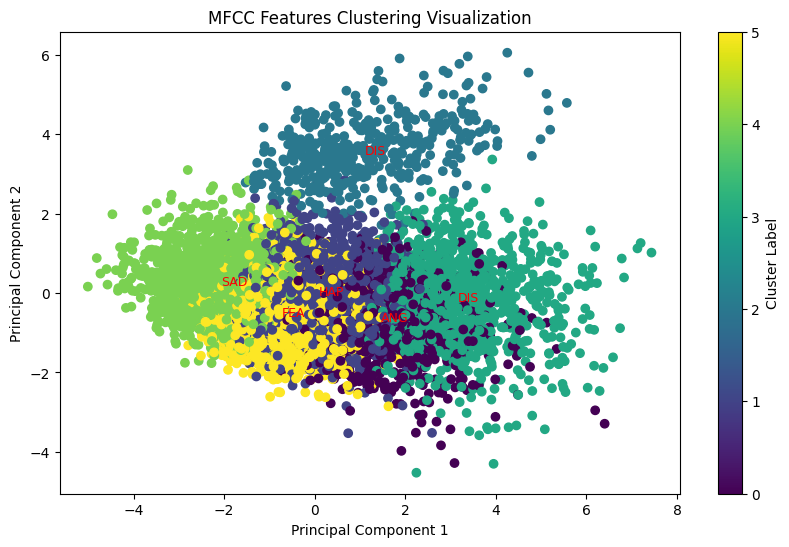

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Calculate the centroids of each cluster
centroids = np.array([principal_components[labels == i].mean(axis=0) for i in range(6)])

# Find the closest data point to each centroid
closest, _ = pairwise_distances_argmin_min(centroids, principal_components)

# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o')

# Annotate the closest points
for i, point in enumerate(closest):
    plt.text(principal_components[point, 0], principal_components[point, 1], 
             emotion_labels[point], fontsize=9, color='red')

# Labeling the plot
plt.title('MFCC Features Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.show()


In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming 'scaled_features' is your array of features after scaling and 'labels' are your cluster labels
# Also assuming 'pca' and 'principal_components' are already defined as in your script

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, labels)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.10469566248692927


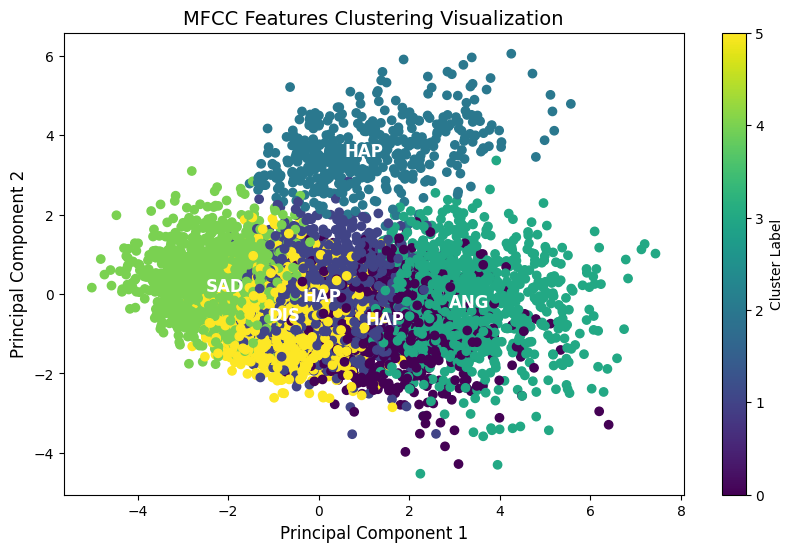

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Calculate the centroids of each cluster
centroids = np.array([principal_components[labels == i].mean(axis=0) for i in range(6)])

# Initialize an empty list to store the label points and their emotions
label_points = []
label_emotions = []

for i in range(6):
    # Filter points in the cluster
    cluster_points = principal_components[labels == i]
    cluster_emotions = np.array(emotion_labels)[labels == i]

    # Find the majority emotion in the cluster
    majority_emotion = max(set(cluster_emotions), key=list(cluster_emotions).count)
    label_emotions.append(majority_emotion)

    # Find the closest point with the majority emotion
    emotion_points = cluster_points[cluster_emotions == majority_emotion]
    closest_point_idx, _ = pairwise_distances_argmin_min(centroids[i:i+1], emotion_points)
    label_points.append(emotion_points[closest_point_idx[0]])

# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o')

# Annotate the chosen points with larger white font
for point, emotion in zip(label_points, label_emotions):
    plt.text(point[0], point[1], emotion, fontsize=12, color='white', 
             ha='center', va='center', weight='bold')

# Labeling the plot
plt.title('MFCC Features Clustering Visualization', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster Label')

plt.show()


In [9]:
import re

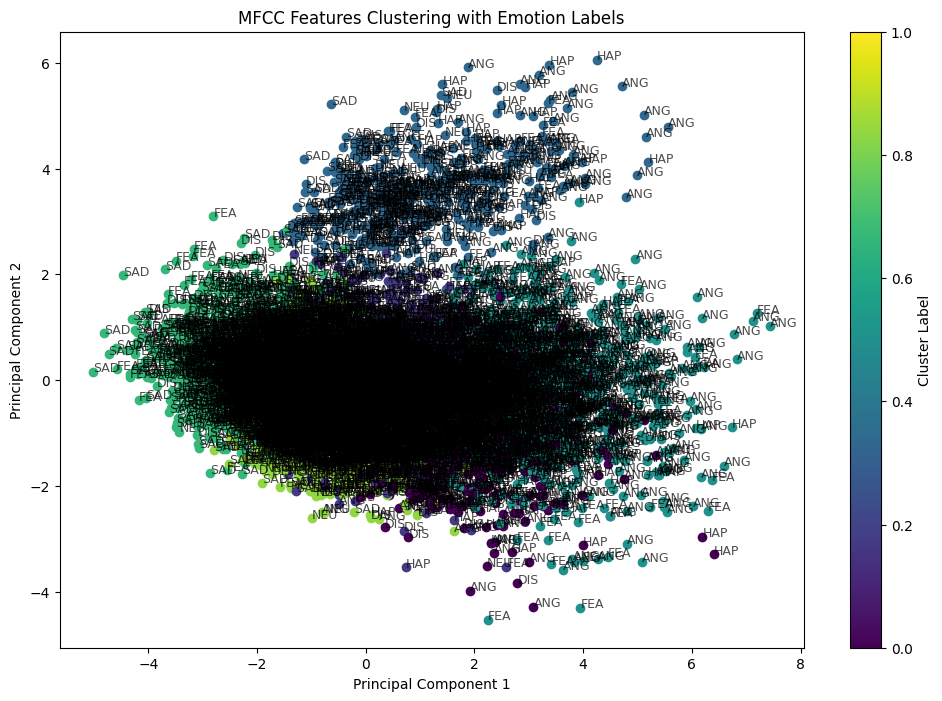

Cluster 0: {'ANG': 274, 'DIS': 101, 'FEA': 106, 'HAP': 279, 'NEU': 127, 'SAD': 33}
Cluster 1: {'ANG': 197, 'DIS': 306, 'FEA': 260, 'HAP': 347, 'NEU': 326, 'SAD': 141}
Cluster 2: {'ANG': 75, 'DIS': 73, 'FEA': 75, 'HAP': 80, 'NEU': 60, 'SAD': 71}
Cluster 3: {'ANG': 573, 'DIS': 71, 'FEA': 147, 'HAP': 178, 'NEU': 6, 'SAD': 6}
Cluster 4: {'ANG': 27, 'DIS': 333, 'FEA': 436, 'HAP': 136, 'NEU': 222, 'SAD': 694}
Cluster 5: {'ANG': 125, 'DIS': 387, 'FEA': 247, 'HAP': 251, 'NEU': 346, 'SAD': 326}


In [14]:
import re
import numpy as np

directory_path = '/Users/priyanshipal/Documents/Aalto/Acads/speech_recognition/project/CREMA-D/AudioWAV/'

# List all .wav files in the directory
audio_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.wav')]
# Function to extract emotion from filename using regex
def extract_emotion(filename):
    match = re.search(r'\d+_.*_(.*)_.*', filename)
    return match.group(1) if match else None

# Assuming file_names is a list of filenames corresponding to each audio file in mfcc_features
emotion_labels = [extract_emotion(filename) for filename in audio_files]

# Visualize the scatter plot with annotations
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(principal_components):
    plt.scatter(x, y, color=plt.cm.viridis(labels[i] / 6))
    plt.text(x, y, emotion_labels[i], fontsize=9, alpha=0.7)

plt.title('MFCC Features Clustering with Emotion Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Analyze the cluster distribution for each emotion
for i in range(6):  # Assuming 6 clusters
    cluster_emotions = np.array(emotion_labels)[labels == i]
    unique, counts = np.unique(cluster_emotions, return_counts=True)
    print(f"Cluster {i}: {dict(zip(unique, counts))}")


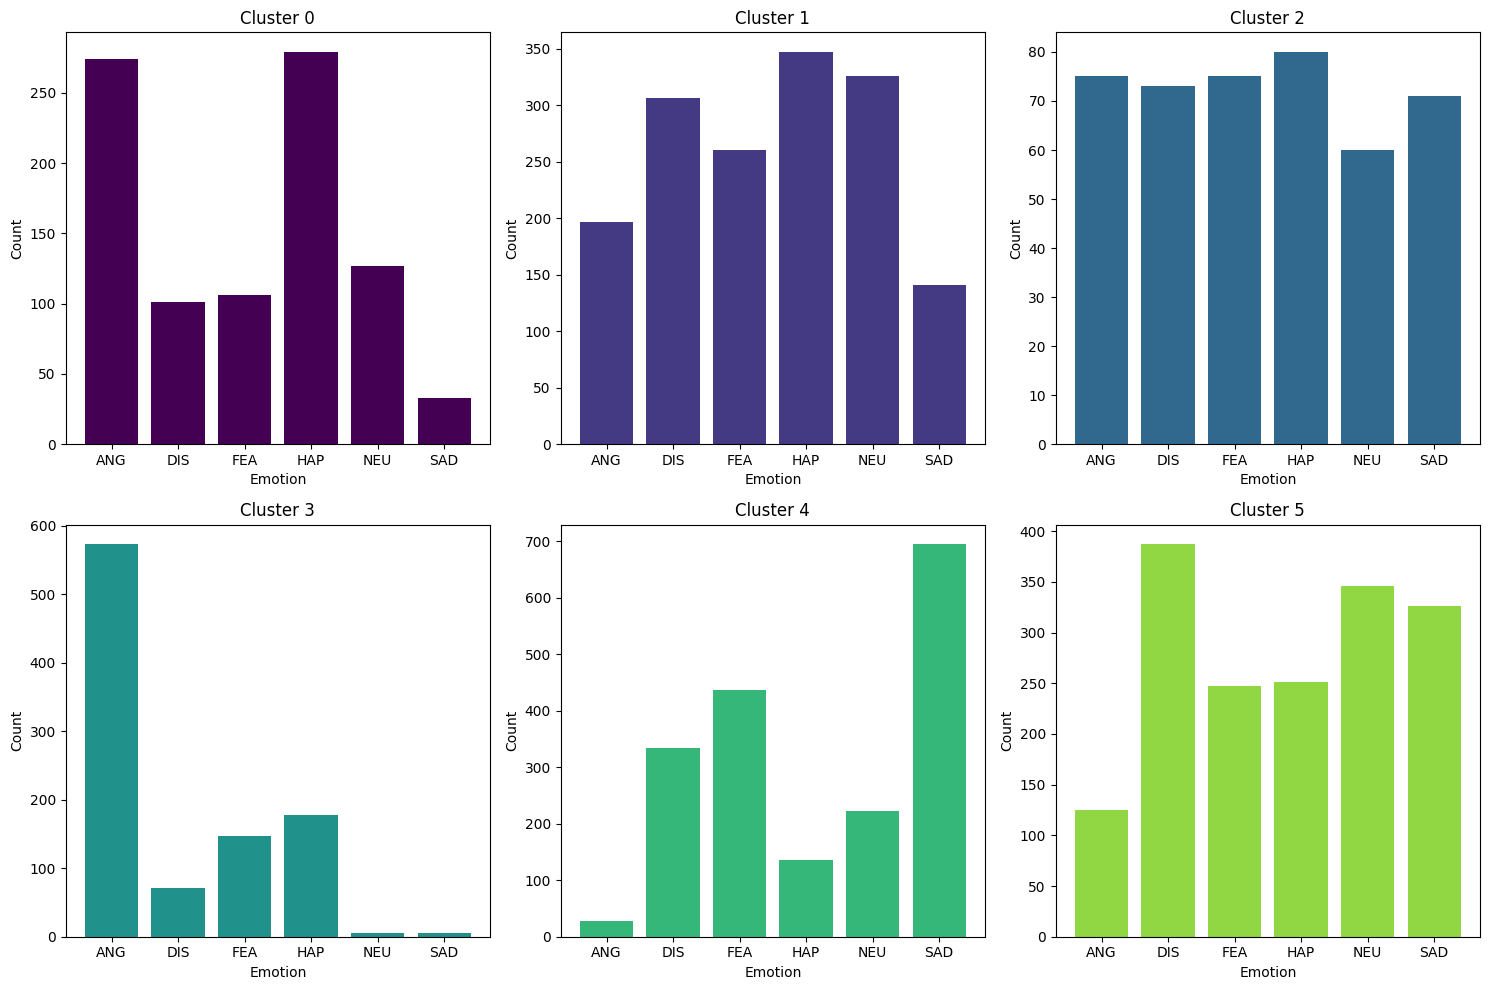

In [16]:
import matplotlib.pyplot as plt

# Your clustering results
cluster_results = {
    0: {'ANG': 274, 'DIS': 101, 'FEA': 106, 'HAP': 279, 'NEU': 127, 'SAD': 33},
    1: {'ANG': 197, 'DIS': 306, 'FEA': 260, 'HAP': 347, 'NEU': 326, 'SAD': 141},
    2: {'ANG': 75, 'DIS': 73, 'FEA': 75, 'HAP': 80, 'NEU': 60, 'SAD': 71},
    3: {'ANG': 573, 'DIS': 71, 'FEA': 147, 'HAP': 178, 'NEU': 6, 'SAD': 6},
    4: {'ANG': 27, 'DIS': 333, 'FEA': 436, 'HAP': 136, 'NEU': 222, 'SAD': 694},
    5: {'ANG': 125, 'DIS': 387, 'FEA': 247, 'HAP': 251, 'NEU': 346, 'SAD': 326}
}

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (cluster, emotions) in enumerate(cluster_results.items()):
    axes[i].bar(emotions.keys(), emotions.values(), color=plt.cm.viridis(i / len(cluster_results)))
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Emotion')

plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'mfcc_features' is your array of features and 'emotion_labels' is your array of labels
X = mfcc_features  # Features
y = emotion_labels  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ANG       0.55      0.69      0.61       386
         DIS       0.36      0.30      0.33       384
         FEA       0.33      0.22      0.26       379
         HAP       0.37      0.35      0.36       390
         NEU       0.33      0.39      0.36       318
         SAD       0.45      0.53      0.49       376

    accuracy                           0.41      2233
   macro avg       0.40      0.41      0.40      2233
weighted avg       0.40      0.41      0.40      2233



In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import itertools
import time

# Assuming 'mfcc_features' and 'emotion_labels' are defined
X = mfcc_features  # Features
y = emotion_labels  # Labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Calculate the total number of combinations
total_combinations = len(list(itertools.product(*param_grid.values())))

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Start time
start_time = time.time()

# Perform the grid search
grid_search.fit(X_train, y_train)

# Calculate and print the time taken
time_taken = time.time() - start_time
print(f"Grid Search took {time_taken:.2f} seconds.")

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Grid Search took 103.06 seconds.
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score:  0.43520441182164643


In [42]:
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

         ANG       0.56      0.72      0.63       386
         DIS       0.38      0.26      0.31       384
         FEA       0.28      0.14      0.18       379
         HAP       0.37      0.37      0.37       390
         NEU       0.32      0.42      0.36       318
         SAD       0.45      0.57      0.50       376

    accuracy                           0.41      2233
   macro avg       0.39      0.41      0.39      2233
weighted avg       0.39      0.41      0.39      2233

Random Forest - CV Scores:  [0.41638684 0.40161182 0.44556452 0.45026882 0.44489247]
Random Forest - Average CV Score:  0.4317448926536537


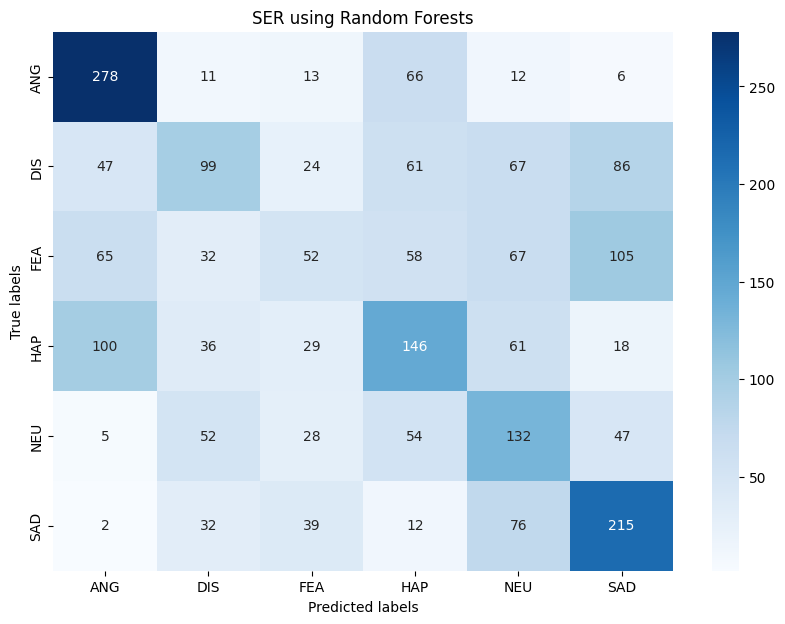

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'mfcc_features' and 'emotion_labels' are defined
X = mfcc_features  # Features
y = emotion_labels  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)



# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

cv_scores_rf = cross_val_score(rf_classifier, X_scaled, y, cv=5)  # 5-fold cross-validation

print("Random Forest - CV Scores: ", cv_scores_rf)
print("Random Forest - Average CV Score: ", cv_scores_rf.mean())

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SER using Random Forests')
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'mfcc_features' is your array of features and 'emotion_labels' is your array of labels
X = mfcc_features  # Features
y = emotion_labels  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the SVM Classifier
#C=10, gamma=0.01, kernel='rbf'
svm_classifier = SVC(C=1, kernel='rbf', gamma=0.1, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)
cv_scores_svm = cross_val_score(svm_classifier, X_scaled, y, cv=5)
print("SVM - CV Scores: ", cv_scores_svm)
print("SVM - Average CV Score: ", cv_scores_svm.mean())
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


SVM - CV Scores:  [0.44660846 0.43720618 0.47849462 0.46505376 0.45564516]
SVM - Average CV Score:  0.45660163781711044
              precision    recall  f1-score   support

         ANG       0.59      0.68      0.63       386
         DIS       0.40      0.33      0.36       384
         FEA       0.39      0.20      0.27       379
         HAP       0.40      0.41      0.41       390
         NEU       0.37      0.46      0.41       318
         SAD       0.46      0.61      0.53       376

    accuracy                           0.45      2233
   macro avg       0.44      0.45      0.43      2233
weighted avg       0.44      0.45      0.43      2233



## from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = mfcc_features  # Features
y = emotion_labels  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Print the number of samples in each set
print(f"Number of samples in training set: {len(X_train)}")
print(f"Number of samples in test set: {len(X_test)}")

# Initialize the SVM Classifier
svm_classifier = SVC(C=1, kernel='rbf', gamma=0.1, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ANG       0.61      0.69      0.65       382
         DIS       0.39      0.35      0.37       381
         FEA       0.37      0.22      0.28       381
         HAP       0.40      0.41      0.40       382
         NEU       0.40      0.43      0.42       326
         SAD       0.46      0.60      0.52       381

    accuracy                           0.45      2233
   macro avg       0.44      0.45      0.44      2233
weighted avg       0.44      0.45      0.44      2233



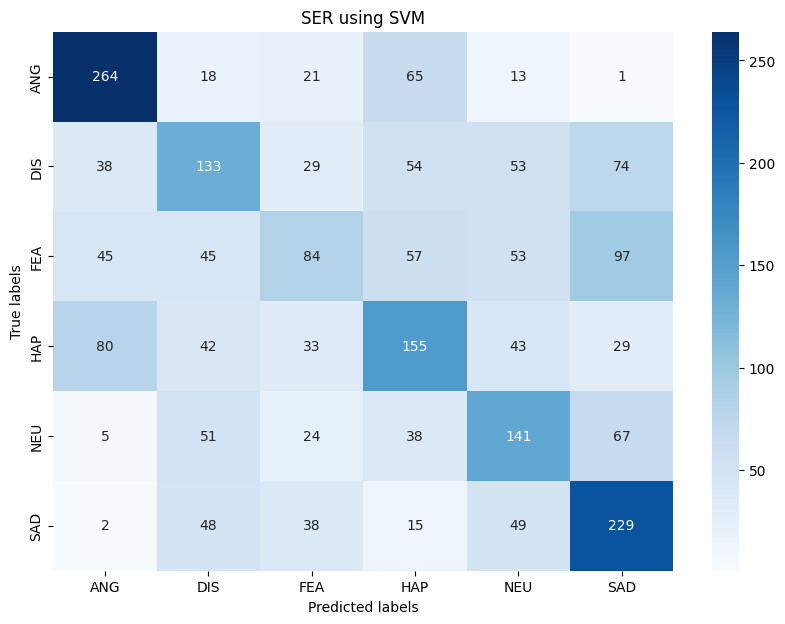

In [39]:
report = classification_report(y_test, y_pred)
print(report)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SER using SVM')
plt.show()

              precision    recall  f1-score   support

         ANG       0.56      0.72      0.63       386
         DIS       0.38      0.26      0.31       384
         FEA       0.28      0.14      0.18       379
         HAP       0.37      0.37      0.37       390
         NEU       0.32      0.42      0.36       318
         SAD       0.45      0.57      0.50       376

    accuracy                           0.41      2233
   macro avg       0.39      0.41      0.39      2233
weighted avg       0.39      0.41      0.39      2233



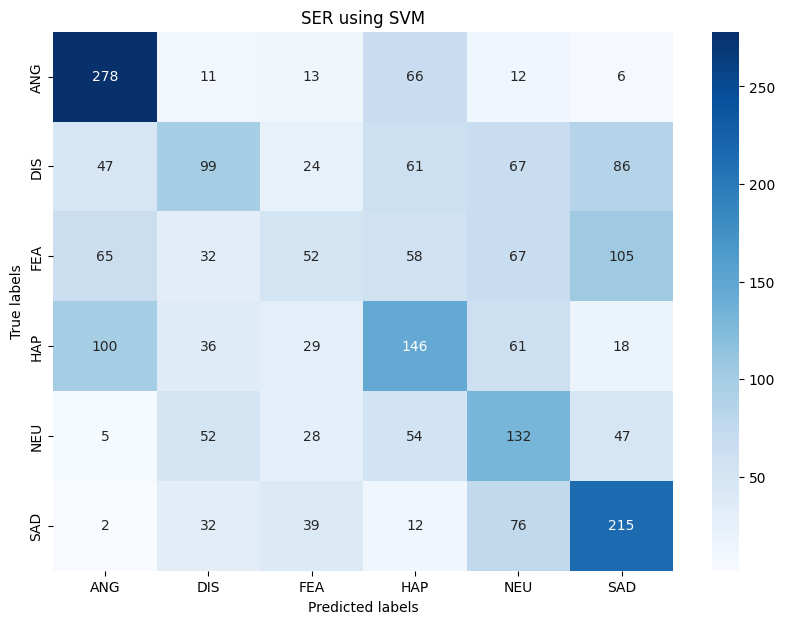

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming 'y_test' is your test labels and 'y_pred' is the predictions from the classifier
report = classification_report(y_test, y_pred)
print(report)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SER using SVM')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'mfcc_features' and 'emotion_labels' are defined
X = mfcc_features
y = emotion_labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values
    'gamma': [1, 0.1, 0.01, 0.001],  # Example values
    'kernel': ['rbf', 'poly', 'sigmoid']  # Example kernels
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on the test set
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.221 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.213 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.227 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.204 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.220 total time=   0.6s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.384 total time=   7.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.384 total time=   8.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.397 total time=   8.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.378 total time=   8.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.384 total time=   8.6s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.244 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.413 total time=   0.3s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.416 total time=   0.3s
[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.400 total time=   0.3s
[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.426 total time=   0.3s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.400 total time=   0.4s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.393 total time=   0.4s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.388 total time=   0.5s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.385 total time=   0.4s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.409 total time=   0.5s
[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.172 total time=   0.4s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.172 total time=   0.4s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.172 total time=   0.4s
[CV 4/5] END .....C=1, gamma

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

In [19]:
print(len(X), len(y))

7442 7442


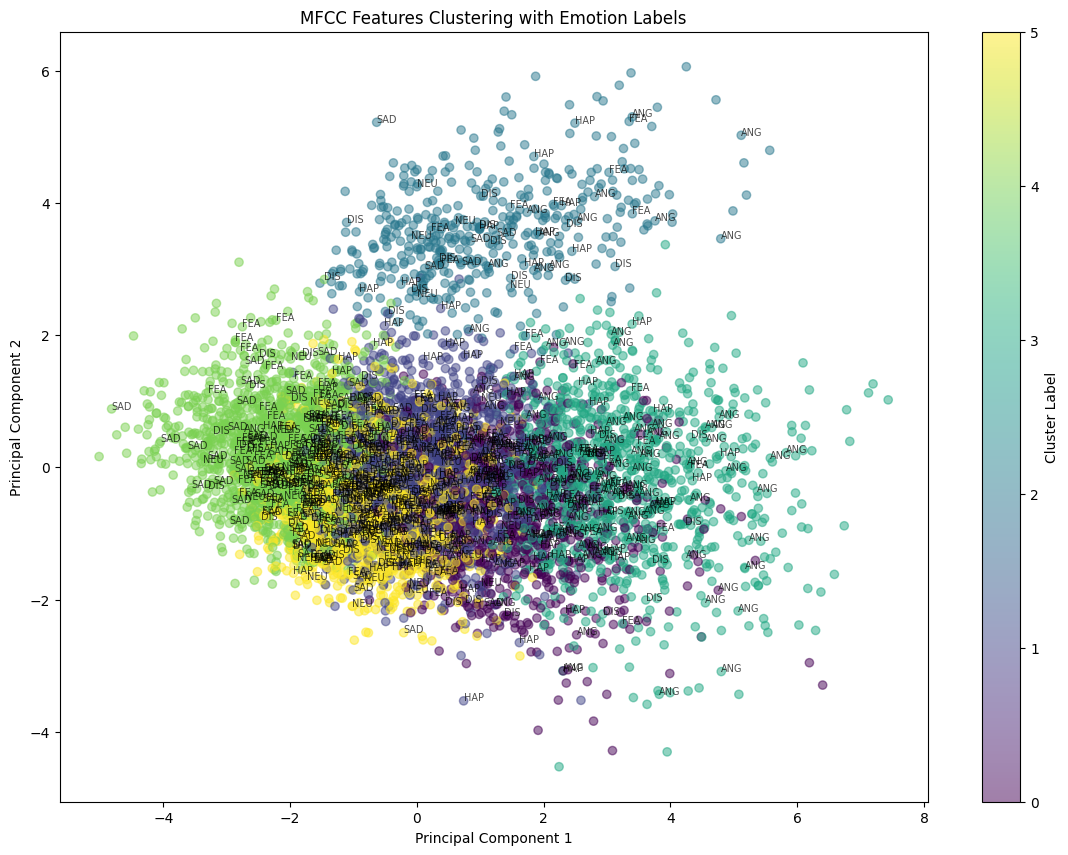

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10))

# Scatter plot with reduced opacity
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
            c=labels, cmap='viridis', alpha=0.5, marker='o')

# Annotate with reduced frequency and smaller font
for i, (x, y) in enumerate(principal_components):
    if i % 10 == 0:  # Annotate every 10th point to reduce clutter
        plt.text(x, y, emotion_labels[i], fontsize=7, alpha=0.7)

plt.title('MFCC Features Clustering with Emotion Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


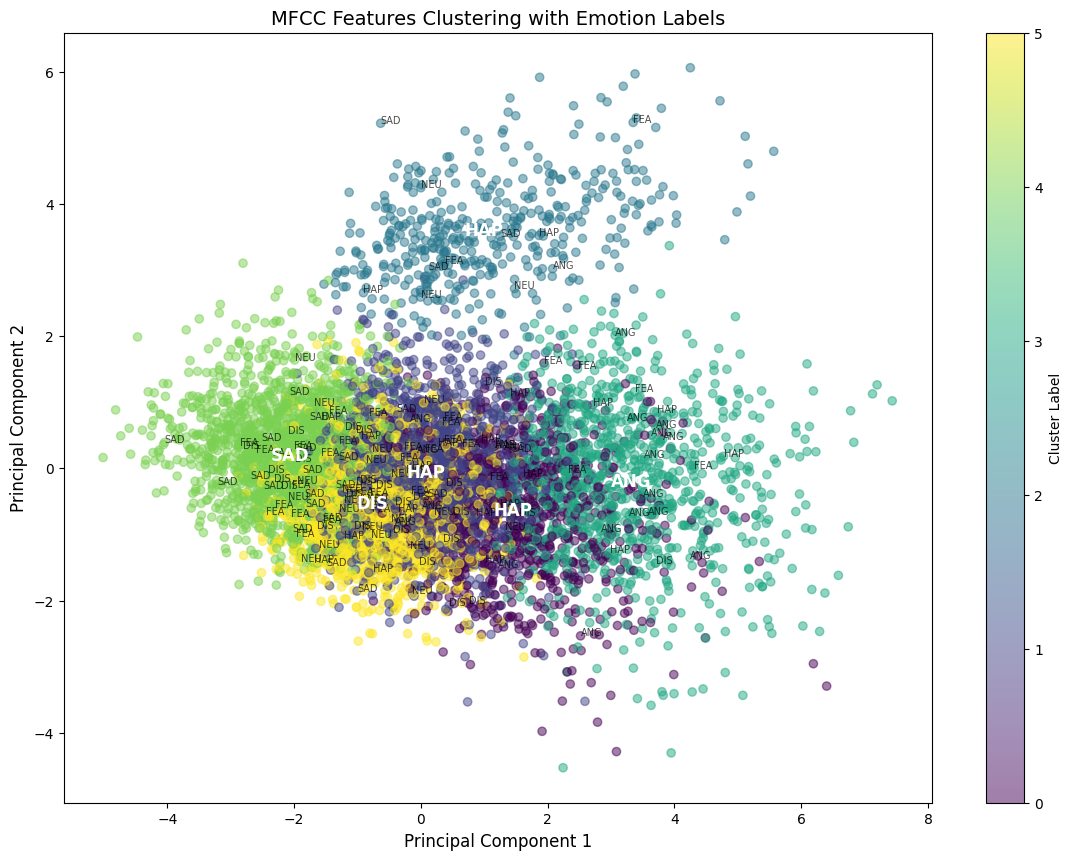

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min

# Assuming principal_components, labels, and emotion_labels are defined

# Calculate the centroids of each cluster
centroids = np.array([principal_components[labels == i].mean(axis=0) for i in range(6)])

# Initialize lists to store the label points and their emotions
label_points = []
label_emotions = []

for i in range(6):
    # Filter points in the cluster
    cluster_points = principal_components[labels == i]
    cluster_emotions = np.array(emotion_labels)[labels == i]

    # Find the majority emotion in the cluster
    majority_emotion = max(set(cluster_emotions), key=list(cluster_emotions).count)
    label_emotions.append(majority_emotion)

    # Find the closest point with the majority emotion
    emotion_points = cluster_points[cluster_emotions == majority_emotion]
    closest_point_idx, _ = pairwise_distances_argmin_min(centroids[i:i+1], emotion_points)
    label_points.append(emotion_points[closest_point_idx[0]])

# Scatter plot of the two principal components
plt.figure(figsize=(14, 10))
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
            c=labels, cmap='viridis', alpha=0.5, marker='o')


# Annotate other points with reduced frequency and smaller font
for i, (x, y) in enumerate(principal_components):
    if i % 50 == 0:  # Annotate every 10th point to reduce clutter
        plt.text(x, y, emotion_labels[i], fontsize=7, alpha=0.7)
        
# Annotate the closest points with larger white font
for point, emotion in zip(label_points, label_emotions):
    plt.text(point[0], point[1], emotion, fontsize=12, color='white', 
             ha='center', va='center', weight='bold')

plt.title('MFCC Features Clustering with Emotion Labels', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.show()


In [12]:
import pandas as pd

# Creating a DataFrame for easier analysis
df = pd.DataFrame({
    'filename': file_names,  # Assuming you have a list of file names
    'cluster': labels
})

print(df.groupby('cluster').count())


NameError: name 'file_names' is not defined

In [10]:
pip install librosa numpy sounddevice



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
